In [1]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variabl

c:\Users\User\anaconda3\envs\py_torc\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'Variabl' from 'torch.autograd' (c:\Users\User\anaconda3\envs\py_torc\lib\site-packages\torch\autograd\__init__.py)

Graph with 63 nodes and 62 edges
Vec3(x=13.5786, y=-51.5181, z=-49.7241)
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (5, 4)	1
  (5, 6)	1
  (6, 5)	1
  (6, 7)	1
  (7, 6)	1
  (7, 8)	1
  (8, 7)	1
  (8, 9)	1
  (9, 8)	1
  (9, 10)	1


C:\Users\User\AppData\Local\Temp\ipykernel_5636\1376783331.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency = nx.adjacency_matrix(grafo)


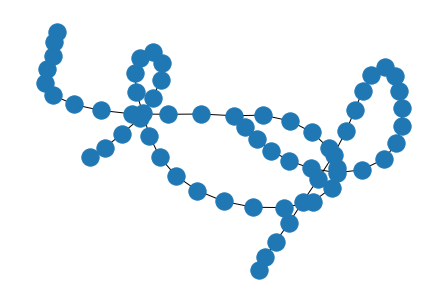

In [ ]:
filename = "ArteryObjAN1-0"

grafo = pickle.load(open(filename + '-grafo.gpickle', 'rb'))
print(grafo)
nx.draw(grafo)
a = nx.get_node_attributes(grafo, 'posicion')
print(a[0])

adjacency = nx.adjacency_matrix(grafo)
print(adjacency[0:10])

Dataloader

Autoencoder

In [ ]:
class Encoder(nn.Module):
    
    def __init__(self, input_size, feature_size):
        super(Encoder, self).__init__()
        self.encoder = nn.Linear(input_size, feature_size)
        self.tanh = nn.Tanh()

    def forward(self, box_input):
        box_vector = self.encoder(box_input)
        box_vector = self.tanh(box_vector)
        return box_vector

In [ ]:
class GRASSEncoder(nn.Module):
    
    def __init__(self, config):
        super(GRASSEncoder, self).__init__()
        self.encoder = Encoder(input_size = config.box_code_size, feature_size = config.feature_size)
        
    def Encoder(self, box):
        return self.encoder(box)


def encode_structure_fold(fold, tree):#que es tree, que es node

    def encode_node(node):
        
        return fold.add('boxEncoder', node.box)
        

    encoding = encode_node(tree.root)
    return fold.add('sampleEncoder', encoding)

Loop de entrenamiento

In [ ]:
train_iter = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, collate_fn=my_collate)

In [ ]:
encoder = GRASSEncoder()
encoder_opt = torch.optim.Adam(encoder.parameters(), lr=1e-3)

In [ ]:
box_code_size = default=12
feature_size=80
hidden_size=200
symmetry_size=8
max_box_num=30
max_sym_num=10
epochs=300
batch_size=123
show_log_every=3
save_log=False
save_log_every=3
save_snapshot=False
save_snapshot_every=5
no_plot=False
lr=.001
lr_decay_by=1
lr_decay_every=1

no_cuda=False
gpu=0
data_path='data'
save_path='models'
resume_snapshot=''

In [ ]:

for epoch in range(epochs):
    
    for batch_idx, batch in enumerate(train_iter):
        # Initialize torchfold for *encoding*
        enc_fold = FoldExt(cuda=config.cuda) #foldext esta definido por ellos, todavia no entendi, creo que lo definen ellos pq trorch fold no soporta batch
        enc_fold_nodes = []     # list of fold nodes for encoding
        # Collect computation nodes recursively from encoding process
        for example in batch:
            enc_fold_nodes.append(encode_structure_fold(enc_fold, example))
        # Apply the computations on the encoder model
        enc_fold_nodes = enc_fold.apply(encoder, [enc_fold_nodes])
        # Split into a list of fold nodes per example
        enc_fold_nodes = torch.split(enc_fold_nodes[0], 1, 0)
        # Initialize torchfold for *decoding*
        dec_fold = FoldExt(cuda=config.cuda)
        # Collect computation nodes recursively from decoding process
        dec_fold_nodes = []
        kld_fold_nodes = []
        for example, fnode in zip(batch, enc_fold_nodes):
            root_code, kl_div = torch.chunk(fnode, 2, 1)
            dec_fold_nodes.append(grassmodel.decode_structure_fold(dec_fold, root_code, example))
            kld_fold_nodes.append(kl_div)
        # Apply the computations on the decoder model
        total_loss = dec_fold.apply(decoder, [dec_fold_nodes, kld_fold_nodes])
            # the first dim of total_loss is for reconstruction and the second for KL divergence
        recon_loss = total_loss[0].sum() / len(batch)               # avg. reconstruction loss per example
        kldiv_loss = total_loss[1].sum().mul(-0.05) / len(batch)    # avg. KL divergence loss per example
        total_loss = recon_loss + kldiv_loss
        # Do parameter optimization
        encoder_opt.zero_grad()
        decoder_opt.zero_grad()
        total_loss.backward()
        encoder_opt.step()
        decoder_opt.step()
        # Report statistics
        if batch_idx % config.show_log_every == 0:
            print(log_template.format(strftime("%H:%M:%S",time.gmtime(time.time()-start)),
                epoch, config.epochs, 1+batch_idx, len(train_iter),
                100. * (1+batch_idx+len(train_iter)*epoch) / (len(train_iter)*config.epochs),
                recon_loss.data[0], kldiv_loss.data[0], total_loss.data[0]))
       

    # Save training log
    if config.save_log and (epoch+1) % config.save_log_every == 0 :
        fd_log = open('training_log.log', mode='a')
        fd_log.write('\nepoch:{} recon_loss:{:.2f} kld_loss:{:.2f} total_loss:{:.2f}'.format(epoch+1, recon_loss.data[0], kldiv_loss.data[0], total_loss.data[0]))
        fd_log.close()

# Save the final models
print("Saving final models ...... ", end='', flush=True)
torch.save(encoder, config.save_path+'//vae_encoder_model.pkl')
torch.save(decoder, config.save_path+'//vae_decoder_model.pkl')
print("DONE")